# Adult Dataset Kaggle

## Dataset Information

#### Source
Donor:

Ronny Kohavi and Barry Becker
Data Mining and Visualization
Silicon Graphics.
e-mail: ronnyk '@' live.com for questions.

#### Information 
Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

#### Column Information
1. age: continuous.
2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. fnlwgt: continuous.
4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5. education-num: continuous.
6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. sex: Female, Male.
11. capital-gain: continuous.
12. capital-loss: continuous.
13. hours-per-week: continuous.
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


### Problem to solve
Prediction task is to determine whether a person makes over 50K a year, so it's means this problem belongs to ***Classification*** type problem

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

In [41]:
# Read data
adult_train = pd.read_csv('../adult_data.csv')
adult_test = pd.read_csv('../adult_test.csv')

In [42]:
adult_train

,age,work class,final weight,education,education number,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [43]:
adult_test

,age,work class,final weight,education,education number,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


## Cleaning Data

1. Remove row that contains " ?" value 

In [44]:
def cleaning_data(data_frame, columns, value):
    data = data_frame.copy()
    for column in columns:
        data = data.drop(data.loc[data[column] == value].index)
    return data


In [45]:
adult_test = cleaning_data(adult_test, ["work class","education","marital status","occupation","relationship"
                      ,"race","sex","native country","target"], " ?")
adult_test

,age,work class,final weight,education,education number,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K.
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [46]:
adult_train = cleaning_data(adult_train, ["work class","education","marital status","occupation","relationship"
                      ,"race","sex","native country","target"], " ?")
adult_train

,age,work class,final weight,education,education number,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Visualization Data

### Distribution of Data

#### Distribution Target

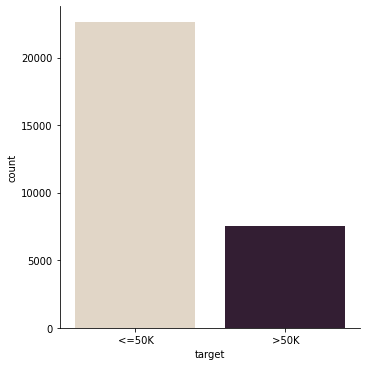

In [47]:
sns.catplot(x="target", kind="count", palette="ch:.25", data=adult_train)

## Relationship between each feature & target

In [48]:
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, OrdinalEncoder
from collections import defaultdict

def to_numeric(df):
    d = defaultdict(LabelEncoder)
    return df.apply(lambda x: d[x.name].fit_transform(x))

def to_numeric_ordinal(df, columns):
    df_copy = df.copy()
    enc = OrdinalEncoder()
    for column in columns:
        df_copy[column] = enc.fit_transform(df_copy[[column]])
    return df_copy

In [49]:
adult_train_transform = to_numeric(adult_train)
# for col in adult_train.select_dtypes(exclude=np.number).columns:
#     unique = adult_train[col].unique()

adult_train_transform.describe()

,age,work class,final weight,education,education number,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,target
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,21.435482,2.199324,9825.221504,10.333764,9.121312,2.580134,5.959850,1.418341,3.678602,0.675685,6.552450,2.072641,39.871527,36.382567,0.248922
std,13.125355,0.953925,5671.017927,3.812292,2.549995,1.498016,4.029566,1.601338,0.834709,0.468126,23.284819,10.028470,11.771826,6.105372,0.432396
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,2.000000,5025.250000,9.000000,8.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,39.000000,38.000000,0.000000
50%,20.000000,2.000000,9689.500000,11.000000,9.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,39.000000,38.000000,0.000000
75%,30.000000,2.000000,14520.750000,12.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,44.000000,38.000000,0.000000
max,71.000000,6.000000,20262.000000,15.000000,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,117.000000,89.000000,93.000000,40.000000,1.000000


In [50]:
dtf = to_numeric_ordinal(adult_train, ["work class","education","marital status", "occupation", "relationship", "race","sex", "native country","target"])
dtf.describe()

,age,work class,final weight,education,education number,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,target
count,30162.000000,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,2.199324,1.897938e+05,10.333764,10.121312,2.580134,5.959850,1.418341,3.678602,0.675685,1092.007858,88.372489,40.931238,36.382567,0.248922
std,13.134665,0.953925,1.056530e+05,3.812292,2.549995,1.498016,4.029566,1.601338,0.834709,0.468126,7406.346497,404.298370,11.979984,6.105372,0.432396
min,17.000000,0.000000,1.376900e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.176272e+05,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,2.000000,1.784250e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,2.000000,2.376285e+05,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,6.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


In [51]:
adult_test_transform = to_numeric(adult_test)

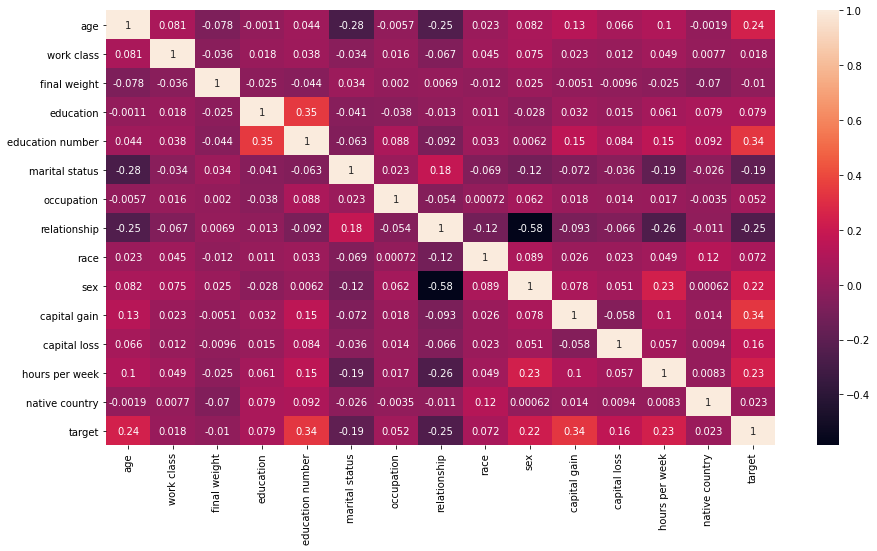

In [52]:
plt.figure(figsize=(15,8))
sns.heatmap(adult_train_transform.select_dtypes(include=np.number).corr(),annot=True)
plt.show()

In [53]:
# Continous value visualization
def visualization_continous_value(columns, target):
    for column in columns:
        sns.relplot(x=column, y=target, hue="target",
                    height=7, data=adult_train)
    plt.show()

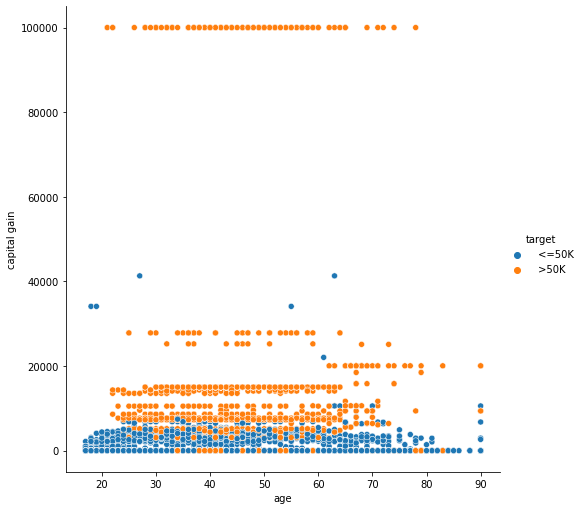

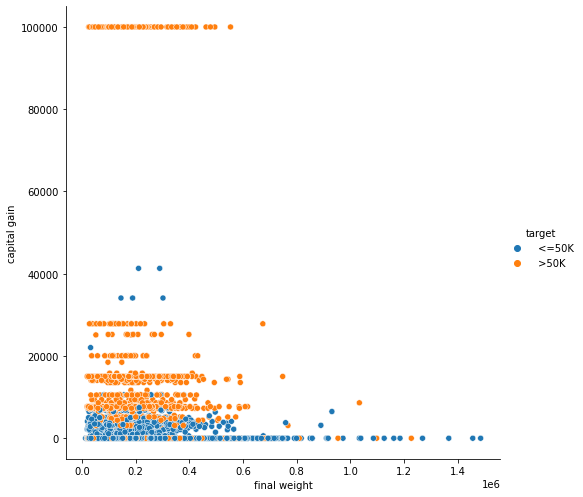

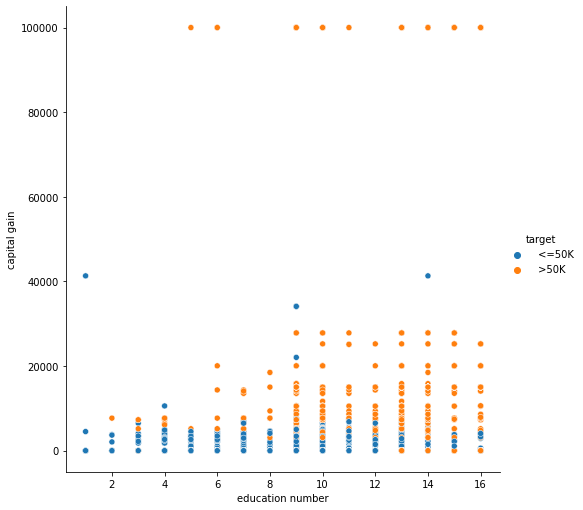

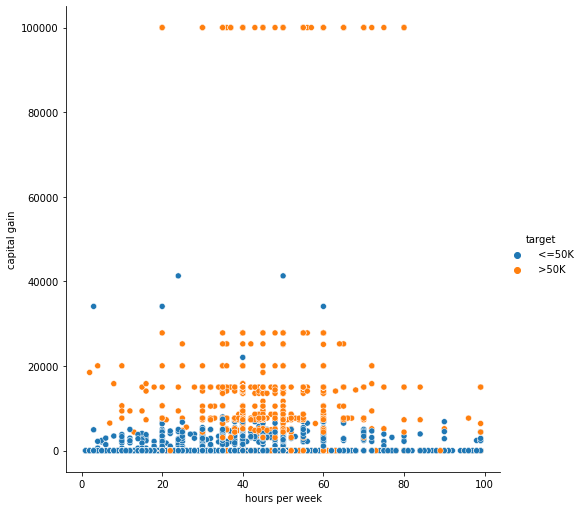

In [54]:
visualization_continous_value(["age","final weight","education number", "hours per week"], "capital gain")

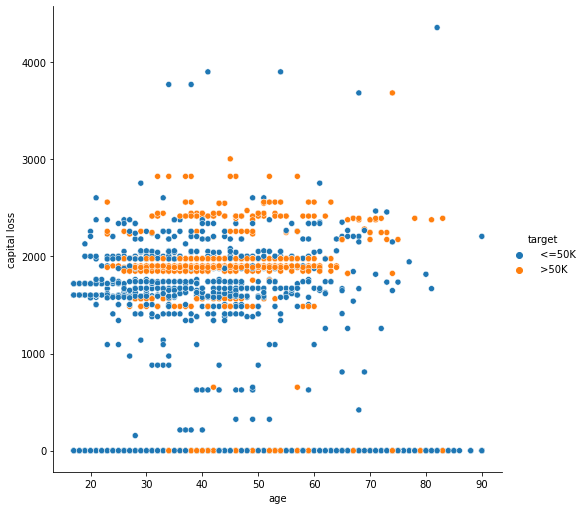

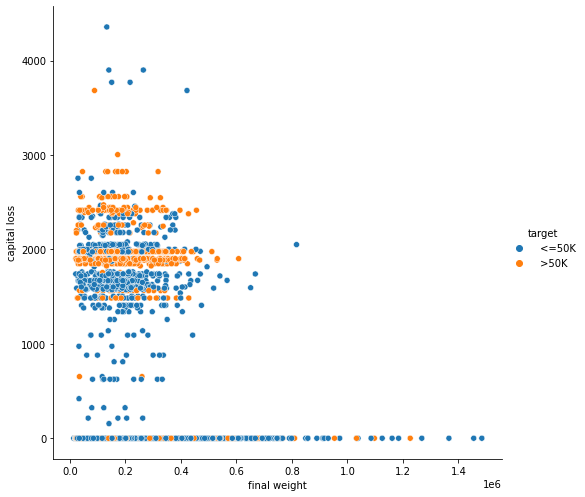

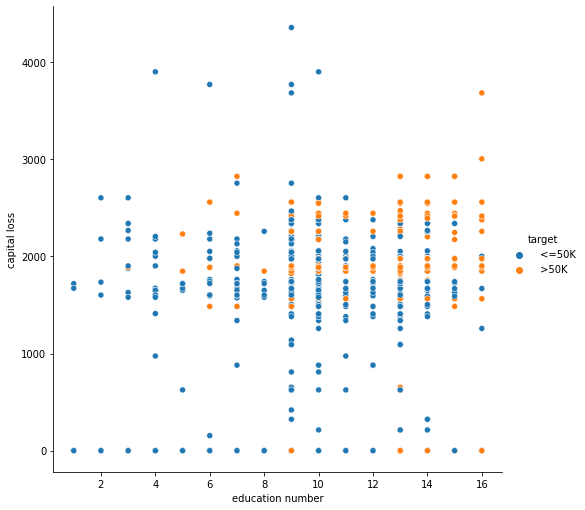

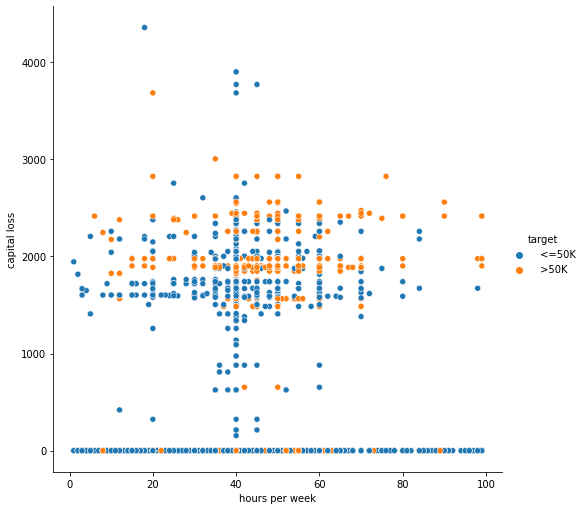

In [55]:
visualization_continous_value(["age","final weight","education number", "hours per week"], "capital loss")

In [56]:
def visualization_categorical_data(columns):
    for column in columns:
        sns.catplot(data=adult_train, x=column, hue="target" ,kind="count",height=7)
        plt.xticks(rotation=90)

In [57]:
adult_train.head()

,age,work class,final weight,education,education number,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


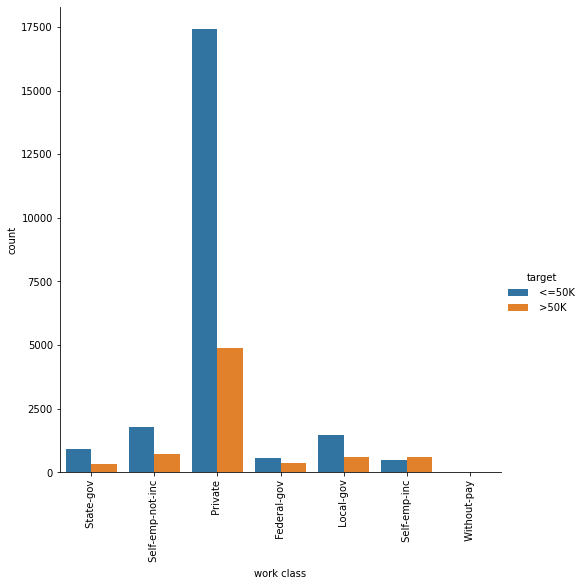

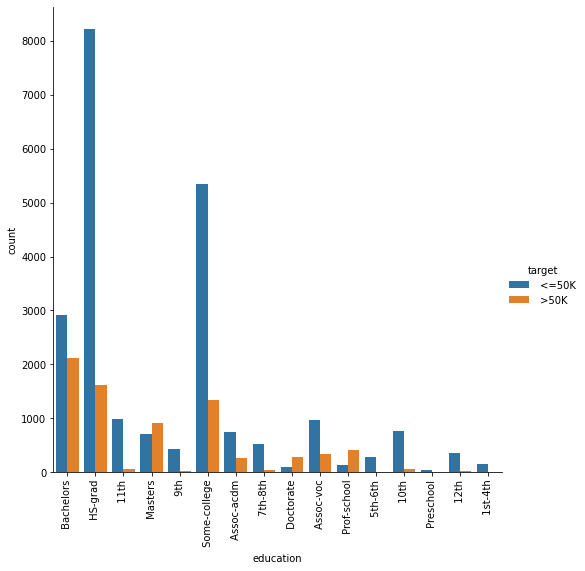

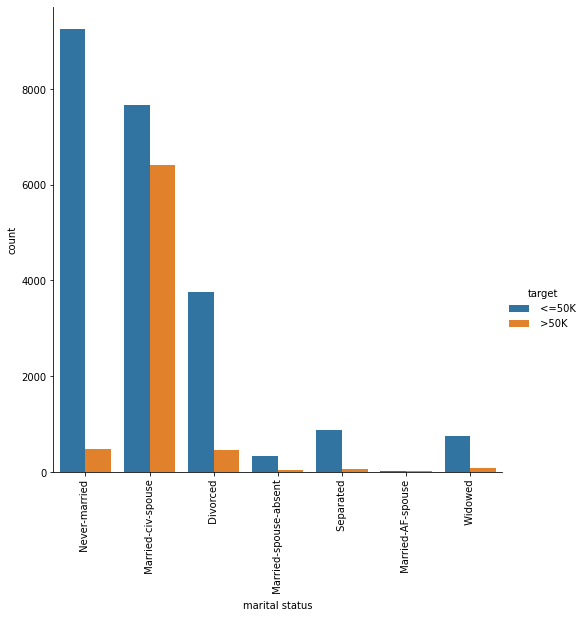

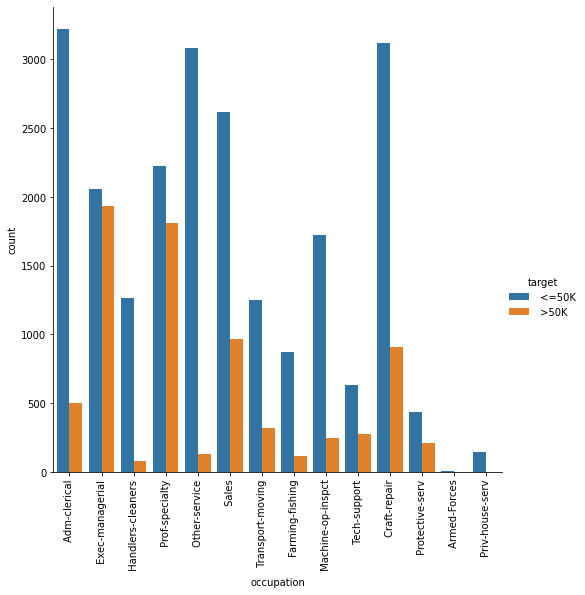

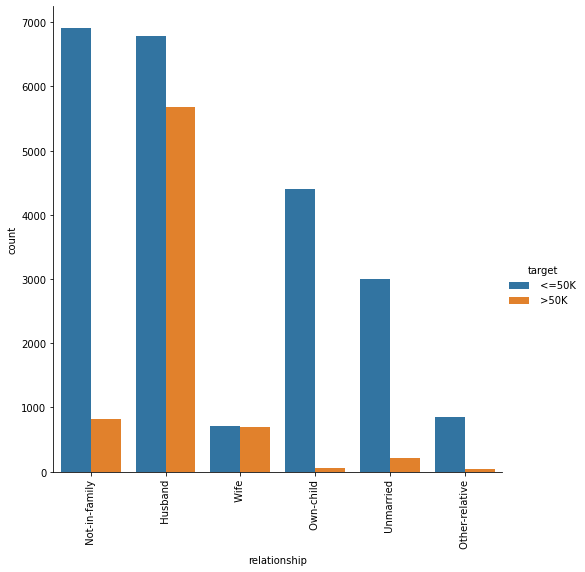

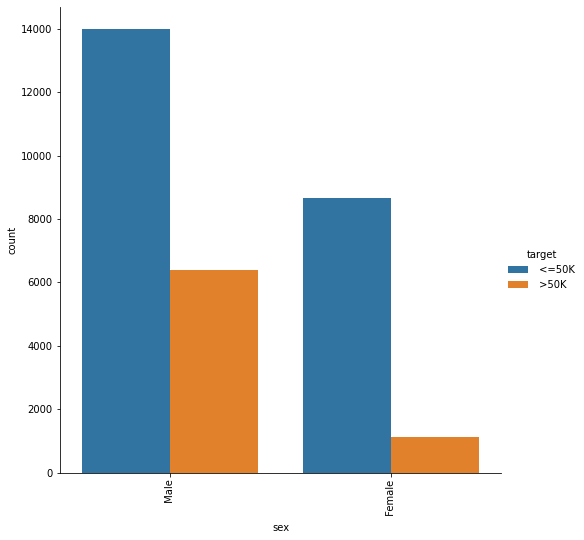

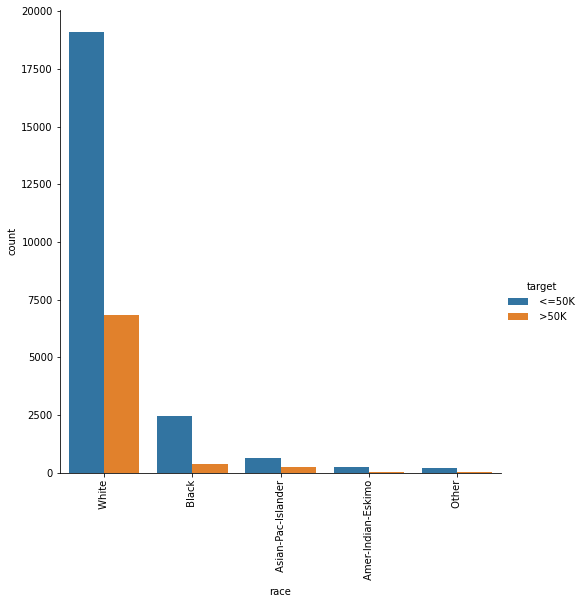

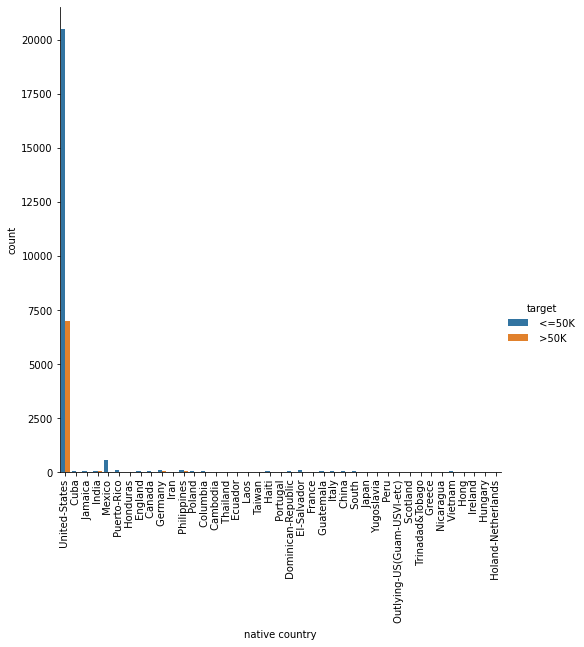

In [58]:
visualization_categorical_data(["work class","education", "marital status", "occupation", "relationship", "sex", "race","native country"])

## Split Dataset

In [59]:
# Drop cloumn that we won't to use as feature
X = adult_train_transform.drop(columns=["work class","final weight","education", "marital status", "occupation", "relationship", "race","native country", "target"]).values
y = adult_train_transform["target"].values

# Prepare Our Model

## Using Logistic Regression

In [60]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

def using_logistic_regression(X,y, random_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)
    logreg = linear_model.LogisticRegression(max_iter = 500)
    logreg.fit(X_train, y_train)
    return logreg.score(X_test, y_test)

In [61]:
# find highest score
score = 0
index = 0
for i in range (1, 100):
    temp = using_logistic_regression(X,y,i)
    if temp > score:
        score = temp
        index = i

In [62]:
# using highest index for random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=index)
model = linear_model.LogisticRegression(max_iter = 500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

### Validating our model using cross validation

In [63]:
from sklearn.model_selection import cross_val_score, cross_val_predict

accuracies = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
print(f"Model accuracy: {np.mean(accuracies) * 100:.2f}%")

Model accuracy: 81.38%


### Test accuracy and score model using test dataset

In [65]:
X_test = adult_test_transform.drop(columns=["work class","final weight","education", "marital status", "occupation", "relationship", "race","native country", "target"]).values
y_test = adult_test_transform["target"].values

print(f"Model score using test dataset: {model.score(X_test, y_test) * 100:.2f}") 

y_test_pred = model.predict(X_test)

test_set_correctly_classified = y_test_pred == y_test
test_set_accuracy = np.mean(test_set_correctly_classified)

print(f"Test set accuracy: {test_set_accuracy * 100:.2f} %")

Model score using test dataset: 81.75
Test set accuracy: 81.75 %


## Using KNN

In [106]:
from sklearn.neighbors import KNeighborsClassifier

def using_knn(X,y, random_state):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)
    kneig = KNeighborsClassifier(n_neighbors=3)
    kneig.fit(X_train, y_train)
    return kneig.score(X_test, y_test)

In [107]:
# find highest score
score = 0
index = 0
for i in range (1, 100):
    temp = using_knn(X,y,i)
    if temp > score:
        score = temp
        index = i

In [108]:
# using highest index for random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=index)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

### Evaluation Model

In [109]:
# Using accuracy score
from sklearn.metrics import accuracy_score, precision_score, recall_score , f1_score, classification_report

acc = accuracy_score(y_test, y_pred)
print("\n===========================================================================================================")
print("Accuracy is the proportion of test instances thaat were classified correctly")
print(f"Model accuracy: {acc * 100:.2f} %")
print("===========================================================================================================\n")


Accuracy is the proportion of test instances thaat were classified correctly
Model accuracy: 81.59 %



In [110]:
# Using precission score
precision = precision_score(y_test, y_pred)
print("\n==========================================================================================================")
print("Precision is the proportion of test instance that were predicted to be positive that are truly positive")
print(f"Model precission: {precision * 100:.2f} %")
print("==========================================================================================================\n")


Precision is the proportion of test instance that were predicted to be positive that are truly positive
Model precission: 64.23 %



In [111]:
# Using recall score
recall = recall_score(y_test, y_pred)
print("\n==========================================================================================================")
print("Recall Score is the proportion of truly positive the test instances that were predicted to be positive")
print(f"Model recall: {recall * 100:.2f} %")
print("==========================================================================================================\n")


Recall Score is the proportion of truly positive the test instances that were predicted to be positive
Model recall: 54.32 %



In [112]:
# Using f1 score
f1 = f1_score(y_test, y_pred)
print("\n==========================================================================================================")
print("F1 score is the harmonic mean of precision and recall")
print(f"Model recall: {f1 * 100:.2f} %")
print("==========================================================================================================\n")


F1 score is the harmonic mean of precision and recall
Model recall: 58.86 %



In [113]:
cr = classification_report(y_test, y_pred)
print("\n==========================================================================================================")
print("Classification Report is summary of all the metric for both of classification")
print(f"{cr}")
print("==========================================================================================================\n")


Classification Report is summary of all the metric for both of classification
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      5713
           1       0.64      0.54      0.59      1828

    accuracy                           0.82      7541
   macro avg       0.75      0.72      0.74      7541
weighted avg       0.81      0.82      0.81      7541




## Conclution from Classification Report

0 = <=50k ;
1 = >50k

1. The All of metrics for validate this model is better in <=50k target this is possible because the distribution of those two target is not even close the difference is about 10k data
2. The Accuracy is suprisingly not to bad

### Test Accuracy and Score using Test data

In [114]:
X_test = adult_test_transform.drop(columns=["work class","final weight","education", "marital status", "occupation", "relationship", "race","native country", "target"]).values
y_test = adult_test_transform["target"].values

print(f"Model score using test dataset: {model.score(X_test, y_test) * 100:.2f}") 

y_test_pred = model.predict(X_test)

test_set_correctly_classified = y_test_pred == y_test
test_set_accuracy = np.mean(test_set_correctly_classified)

print(f"Test set accuracy: {test_set_accuracy * 100:.2f} %")

Model score using test dataset: 78.85
Test set accuracy: 78.85 %
